Alunos: Anderson Soares da Silva, Mariana Gonçalves Rodrigues

R.A: 2150875, 2151014


Desafio – Parte 1 (DES_1) - Análise da rede fornecida:

Nesta primeira entrega você deve fazer uma análise da rede fornecida. Rede disponível no kaggle:
https://www.kaggle.com/t/92c34c3022184f929d005c797f8b8e1f

É esperado visualizações e análises relevantes da rede, com o intuito de proporcionar o entendimento das principais propriedades da mesma. Além disso, é esperado uma breve discussão dos principais achados obtidos. Procure entender como alguns dos resultados obtidos poderiam ser úteis no objetivo final do desafio.


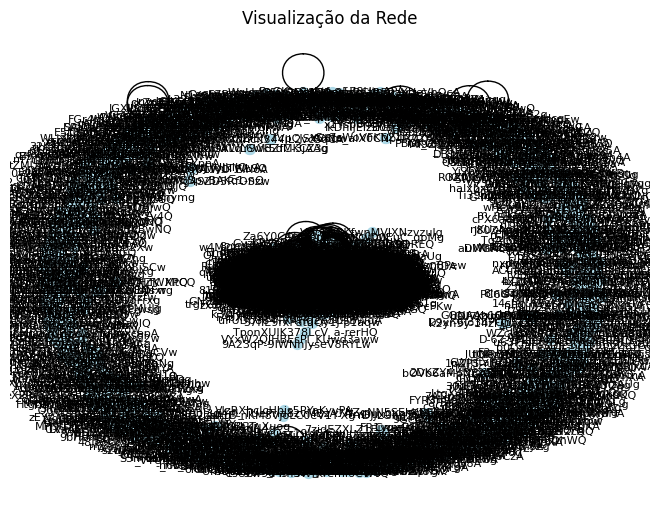

Degree Centrality:
Node ql0AaBp68ckekxvWOF8xLA: 0.00043725404459991256
Node WHxonk9W_sRLk8cwOoZQqQ: 0.00043725404459991256
Node P6HDtlj1GSu9UG2Aal2PPg: 0.00021862702229995628
Node 3kUqNxO1rkDDb89GAfyNgw: 0.003716659379099257
Node v_pED2nMFPsBGD4Tq2ygBw: 0.0
Node nZDIrGshkfLZf6ImQtAasQ: 0.0026235242675994755
Node cqPrr2uDMLP9_cPbIiOSrA: 0.0006558810668998689
Node O1ird5yRyuDFnOmYu90OoA: 0.010056843025797988
Node -UjCvAsvBOr19y8lqPueiQ: 0.0008745080891998251
Node zzBa0pQjM1gov00bXjYYXg: 0.001530389156099694
Node 6JRFtzzJUYZxFC7mWa9_xQ: 0.00043725404459991256
Node 2VRVAhzefxIqjzbQ21LdHg: 0.010931351114997814
Node MLVnaAgR3FD2O9mBTKDqoQ: 0.008963707914298208
Node wjLgM9Ybe5shoUPRrGMmsQ: 0.016615653694796676
Node AdHBtjNeuuAU4w6E7NCkfQ: 0.0008745080891998251
Node 2A9gJkmWbBVoh6kK0jDlxA: 0.00021862702229995628
Node XUDOc980cjB0PZvVS-T6Eg: 0.0017490161783996502
Node f2FfutZhb4F-m1Ob0EdYaw: 0.003060778312199388
Node X47pt6a4ID4aM2ONYdSW8Q: 0.002186270222999563
Node pzKdQnjQUtMGLgPW6Fxr_Q: 0.00

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.read_gml("GraphMissingEdges.gml")

nx.draw(G, with_labels=True, node_size=50, font_size=8, node_color='lightblue')
plt.title("Visualização da Rede")
plt.show()

degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

print("Degree Centrality:")
for node, centrality in degree_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nCloseness Centrality:")
for node, centrality in closeness_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nBetweenness Centrality:")
for node, centrality in betweenness_centrality.items():
    print(f"Node {node}: {centrality}")

print("\nEigenvector Centrality:")
for node, centrality in eigenvector_centrality.items():
    print(f"Node {node}: {centrality}")


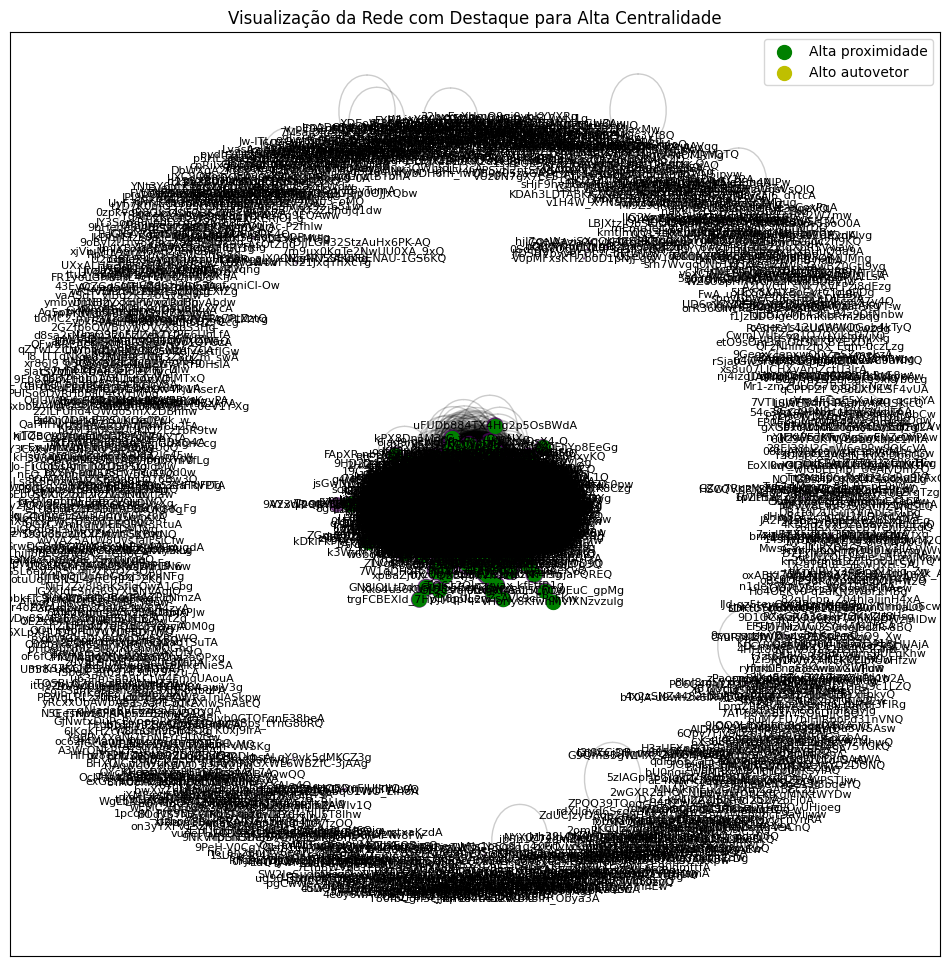

In [5]:
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

cutoff = 0.1  

high_degree_centrality = [node for node, centrality in degree_centrality.items() if centrality > cutoff]
high_closeness_centrality = [node for node, centrality in closeness_centrality.items() if centrality > cutoff]
high_betweenness_centrality = [node for node, centrality in betweenness_centrality.items() if centrality > cutoff]
high_eigenvector_centrality = [node for node, centrality in eigenvector_centrality.items() if centrality > cutoff]

node_color = [degree_centrality[node] for node in G.nodes()]
node_size = [1000 * closeness_centrality[node] for node in G.nodes()]

pos = nx.spring_layout(G)

plt.figure(figsize=(12, 12))

nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=node_size, cmap=plt.cm.viridis, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.2)
nx.draw_networkx_labels(G, pos, font_size=8)

nx.draw_networkx_nodes(G, pos, nodelist=high_degree_centrality, node_color='r', node_size=100, label="Alto Grau")
nx.draw_networkx_nodes(G, pos, nodelist=high_closeness_centrality, node_color='g', node_size=100, label="Alta proximidade")
nx.draw_networkx_nodes(G, pos, nodelist=high_betweenness_centrality, node_color='b', node_size=100, label="Alta intermediação")
nx.draw_networkx_nodes(G, pos, nodelist=high_eigenvector_centrality, node_color='y', node_size=100, label="Alto autovetor")

plt.legend()

plt.title("Visualização da Rede com Destaque para Alta Centralidade")
plt.show()
